Post simulation checks

In [ ]:
# Import modules
import numpy as np
import zarr
#import allel   
#idk why but my allel doesnt seem to load?? even though ive definitely installed it as scikit-allel
import scipy.cluster.hierarchy as sch
import scipy.spatial
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal
from scipy.ndimage import gaussian_filter1d
from numpy.lib.stride_tricks import sliding_window_view
from tqdm import tqdm
import dask
from dask.delayed import delayed
from dask.base import compute
from itertools import combinations
import time
import seaborn as sns
import sys
import tskit

1. import in vcf/ tree file to examine population size


In [4]:
# checking .tree outputs
import tskit
#tskit.load(file="C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/burnin_no.19_early.trees")
tree = tskit.load(file="C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/burnin_no.19_complete.trees")
print(tree)
tree.max_root_time

# install pyslim !!! issue here involving msprime? pyslim cannot be imported/downloaded
#import pyslim

# read into pyslim and calculate nucleotide diversity and compare against expected nucleotide diversity (theta)
# check that it exceeds 10% and not more than 20%


╔═════════════════════════╗
║TreeSequence             ║
╠═══════════════╤═════════╣
║Trees          │    10001║
╟───────────────┼─────────╢
║Sequence Length│    10001║
╟───────────────┼─────────╢
║Time Units     │    ticks║
╟───────────────┼─────────╢
║Sample Nodes   │    20000║
╟───────────────┼─────────╢
║Total Size     │154.9 MiB║
╚═══════════════╧═════════╝
╔═══════════╤═══════╤═════════╤════════════╗
║Table      │Rows   │Size     │Has Metadata║
╠═══════════╪═══════╪═════════╪════════════╣
║Edges      │2449938│ 74.8 MiB│          No║
╟───────────┼───────┼─────────┼────────────╢
║Individuals│  10000│978.4 KiB│         Yes║
╟───────────┼───────┼─────────┼────────────╢
║Migrations │      0│  8 Bytes│          No║
╟───────────┼───────┼─────────┼────────────╢
║Mutations  │ 792448│ 46.8 MiB│         Yes║
╟───────────┼───────┼─────────┼────────────╢
║Nodes      │ 370435│ 13.4 MiB│         Yes║
╟───────────┼───────┼─────────┼────────────╢
║Populations│      1│  2.3 KiB│         Yes║
╟─────

5000.0

2. Plot nucleotide diversity for all simulations.
- red flag if nucleotide diversity smaller than 10% or greater than 20%
- a. confidence intervals!
- make vector or csv with nucleotide diversity metric

     Array Index      SeedID   cycle  Heterozygosity
0              1  1811758731    5000        0.108301
1              1  1811758731    6000        0.110578
2              1  1811758731    7000        0.101295
3              1  1811758731    8000        0.098718
4              1  1811758731    9000        0.097035
..           ...         ...     ...             ...
807            1  1811758731  812000        0.103860
808            1  1811758731  813000        0.095931
809            1  1811758731  814000        0.099199
810            1  1811758731  815000        0.086761
811            1  1811758731  816000        0.100898

[812 rows x 4 columns]


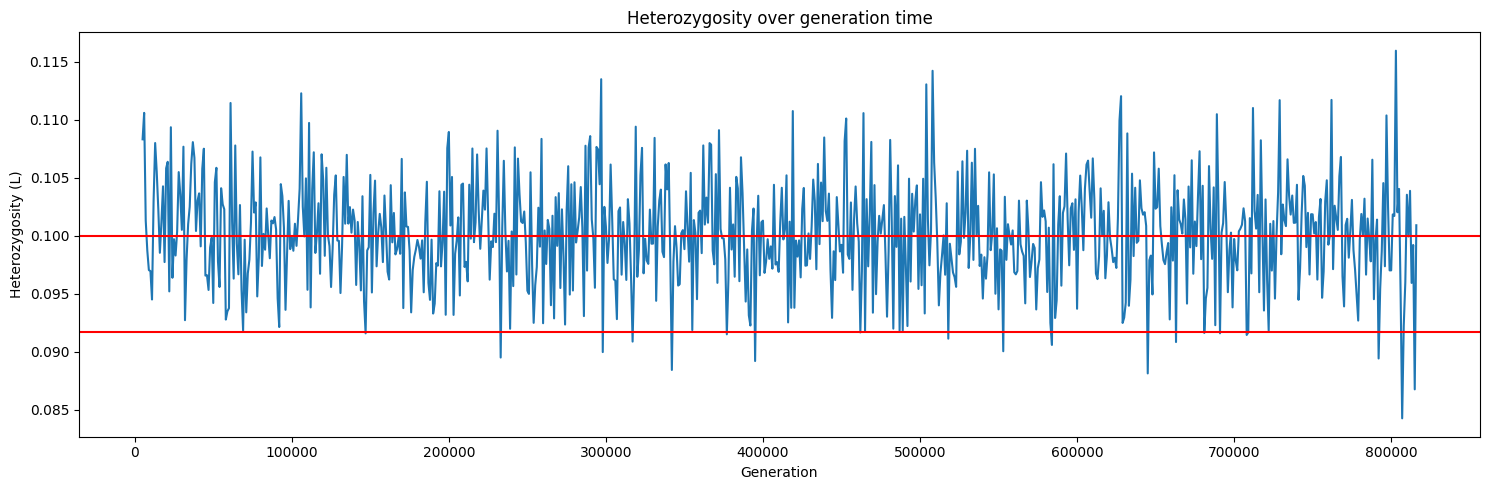

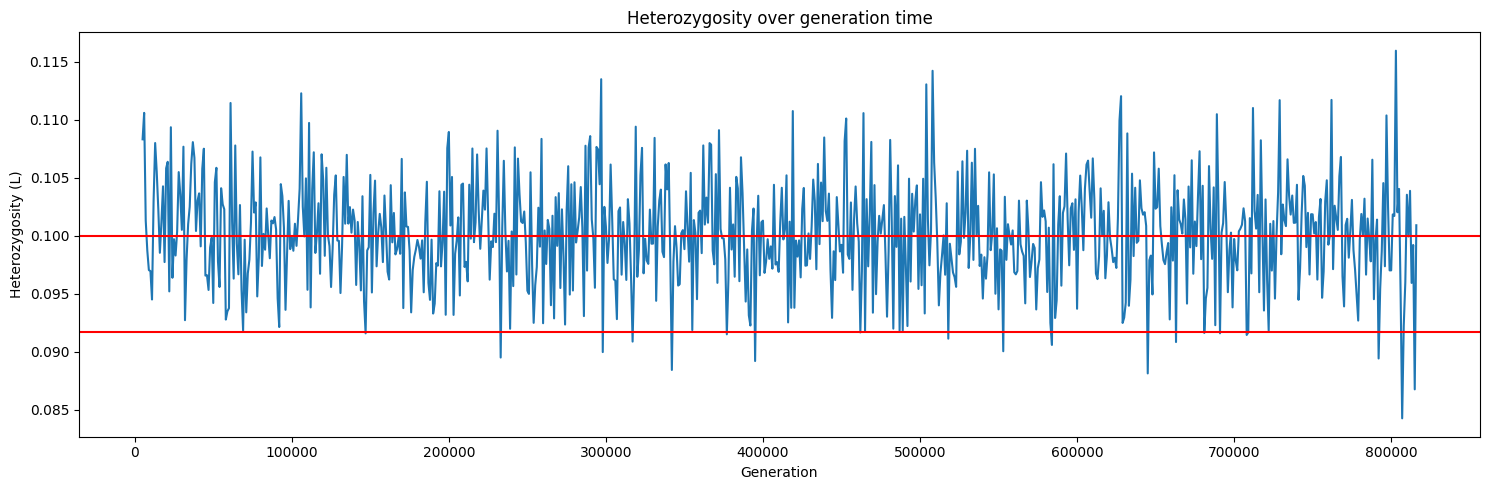

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#parameters = pd.read_csv('C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/Estimating-effective-population-size-from-resistance-loci/simulations/parameter_combinations.csv')
#print(parameters)
#how to loop through and calculate for each combination?


def check_Nuc_Diversity(logfile_path, array_num):
    '''
    This function plots the heterozygosity from each simulation against tick time and prints the number of ticks for checking.
    
    Arguments:
        logfile_path: filepath of the output logfile (from SLiM soft sweep simulation)
        array_num : combination number of this simulation (1-27)
        
    Returns:
        figure: plot of heterozygosity against tick with baseline and upperlimit for reference
        

    ''' 
    #plot size etc
    plt.rcParams["figure.figsize"] = [15, 5]
    plt.rcParams["figure.autolayout"] = True

    # read in csv of parameter combinations and nucleotide diversity
    parameters = pd.read_csv('C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/Estimating-effective-population-size-from-resistance-loci/simulations/parameter_combinations.csv')
    index = array_num +1
    baseline = parameters.iloc[index]['baseline']
    upperlimit = parameters.iloc[index]['upperlimit']

    # read in logfile.csv (interval=1000ticks) 
    df = pd.read_csv(logfile_path)
    print(df) #debug point


    # initial plot to check data is okay
    figure = plt.figure()
    plt.plot('cycle','Heterozygosity', data = df, figure=figure)
    plt.axhline(y=baseline, color='r', linestyle='-', figure=figure) #10% of nucleotide diversity for reference
    plt.axhline(y=upperlimit, color='r', linestyle='-', figure=figure) #20% of nuc diversity for reference
    plt.xlabel('Generation', figure=figure)
    plt.ylabel('Heterozygosity (L)', figure=figure)
    plt.title('Heterozygosity over generation time', figure=figure)
    plt.show()

    return figure



#test function on a simulation logfile
check_Nuc_Diversity('C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/1_1811758731.csv', 1)


